# Cohort Selection Criteria

The purpose of this file is to get a sense of how many survivors there are and how death is distributed across 5 years.

There are a few dead patients with prior treatment, but we don't know if they have all the necessary germ/tum files yet.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [123]:
df = pd.read_csv('1-dedup.csv')

---

In [124]:
df['prior_treatment'].value_counts()

No     321
Yes      2
Name: prior_treatment, dtype: int64

In [125]:
df = df[
    df['prior_treatment']=="No"
]

In [126]:
df['prior_malignancy'].value_counts()

no     297
yes     24
Name: prior_malignancy, dtype: int64

In [243]:
follow_days = 365*4

---

# Survivors

Need a threshold for minimum follow up so that we can make sure they are actually alive

In [244]:
df_alive = df[
    (df['vital_status'] == 'Alive') & (df['days_to_last_follow_up']!="'--")
].astype({'days_to_last_follow_up':'float64'})

Follow up dropping off after 5 years doesn't mean they died. They may have stopped following up.

In [245]:
df_aliveMatch = df_alive[
    (df_alive['days_to_last_follow_up'] >=  follow_days)
]

In [246]:
df_aliveMatch['prior_treatment'].value_counts()

No    44
Name: prior_treatment, dtype: int64

## Plot Data for Survivors

In [247]:
alives = []
for i in range(9):
    i = i*365
    
    a = df_alive[
        df_alive['days_to_last_follow_up'] >= i
    ].shape[0]
    
    alives.append(a)

---

# Deceased

In [248]:
df_dead = df[
    (df['vital_status'] == 'Dead') & (df['days_to_death'] != "'--")
].astype({'days_to_death':'int64'})

In [249]:
df_dead.shape[0]

96

In [250]:
df_deadMatch = df_dead[
    (df_dead['days_to_death'] >= 120) & 
    (df_dead['days_to_death'] <= follow_days)
]

In [251]:
df_deadMatch.shape[0]

65

In [252]:
df_deadMatch['prior_treatment'].value_counts()

No    65
Name: prior_treatment, dtype: int64

## Plot Data for Deceased

In [253]:
num_dead = df_dead.shape[0]

In [254]:
deads = []
for i in range(9):
    i = i*365
    
    d = df_dead[
        (df_dead['days_to_death'] >= i)
    ].shape[0]
    
    d = num_dead - d
    
    deads.append(d)

---

## Survival Plots for Decision Making

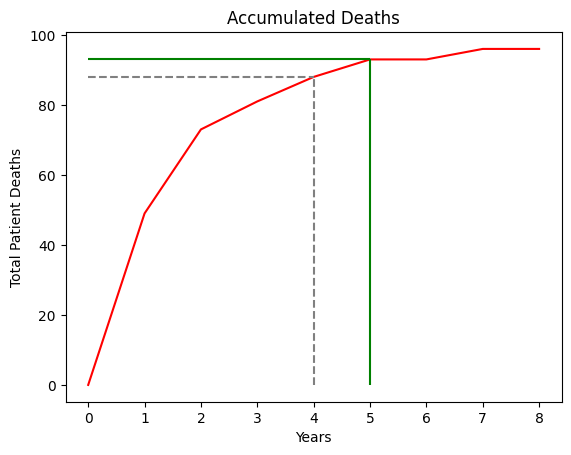

In [255]:
plt.plot(deads, color='red')
plt.xlabel("Years")
plt.ylabel("Total Patient Deaths")
plt.title("Accumulated Deaths")

plt.hlines(y=88, xmin=0, xmax=4, color='gray', ls="--")
plt.hlines(y=93, xmin=0, xmax=5, color='green', ls="-")

plt.vlines(x=4, ymin=0, ymax=88, color='gray', ls="--")
plt.vlines(x=5, ymin=0, ymax=93, color='green', ls="-")

In [256]:
((115/108)-1)*100

6.481481481481488

- Death is incremental after 3 years. It plateaus.
- Keep in mind that we don't know cause of death, and that obesity goes hand-in-hand with cancer. As time goes on, the chance of death from non-cancer causes increase.

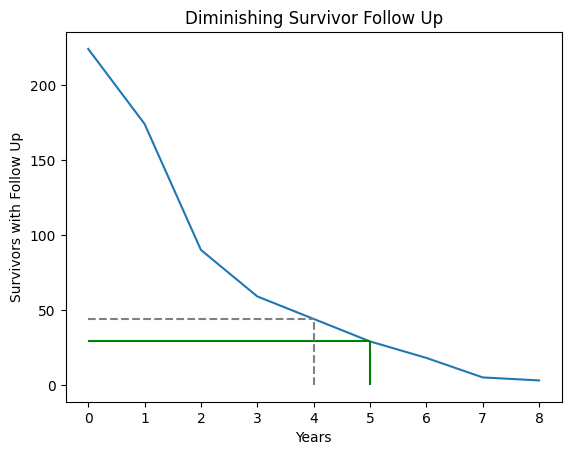

In [257]:
plt.plot(alives)
plt.xlabel("Years")
plt.ylabel("Survivors with Follow Up")
plt.title("Diminishing Survivor Follow Up")

plt.hlines(y=44, xmin=0, xmax=4, color='gray', ls="--")
plt.hlines(y=29, xmin=0, xmax=5, color='green', ls="-")

plt.vlines(x=4, ymin=0, ymax=44, color='gray', ls="--")
plt.vlines(x=5, ymin=0, ymax=29, color='green', ls="-")

In [258]:
((69/54)-1)*100

27.777777777777768

---

In [259]:
df_match = pd.concat([df_aliveMatch,df_deadMatch])

In [260]:
df_match.shape

(109, 158)

In [261]:
df_match['vital_status'].value_counts()

Dead     65
Alive    44
Name: vital_status, dtype: int64

In [262]:
df_match['project_id'].value_counts()

TCGA-LIHC    109
Name: project_id, dtype: int64

In [263]:
df_match[
    df_match['project_id']=='TCGA-LUAD'
]['vital_status'].value_counts()

Series([], Name: vital_status, dtype: int64)

In [264]:
df_match[
    df_match['project_id']=='TCGA-LUSC'
]['vital_status'].value_counts()

Series([], Name: vital_status, dtype: int64)

11 patients where age is unknown

In [265]:
# df_match = df_match.astype({'age_at_index':'int'})

In [266]:
df_match.to_csv('2-select.csv',index=False)